# 0) Instructions:
Please complete the workbook below. Some of the calculations are already ready to be "run". However, please read the text carefully to find questions that you should answer for credit. Remember that to answer a question in text, you click "insert", then "insert cell below", switch the input from "code" to "markdown", type your answer, and finally click the run button to set your text in stone. In a few questions, you will need to do some calculations on your own. Hint: for these calculations you can copy, paste, and modify code that is above the calculation that you need to do. You may work by yourself or in groups of 2. Please remember to put your name on top, remember to save the workbook, and remember to upload to Canvas.

Please run the cell below to load the "tidyverse" set of packages and set the plot window width and height:

In [1]:
library(tidyverse)
options(repr.plot.width = 5, repr.plot.height = 4)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# 1) It must be the soil

Today, we will answer some research questions regarding soil composition using a dataset that was published in: Horton, I. F.,Russell, J. S., and Moore, A. W. (1968) Multivariate-covariance and canonical analysis: A method for selecting the most effective discriminators in a multivariate situation. *Biometrics 24*, 845–858.

**Warning**, I don't know anything about soil so the "research questions" that we ask might be silly. Also, the data comes from a study with a complex study design that we will not address (it is not a simple random sample).

First, let's load the soil dataset "Soils", that is in the package *carData*, and then let's use the "head" function to print the first 6 observations. 

In [2]:
Soils <- carData::Soils
head(Soils)

Group,Contour,Depth,Gp,Block,pH,N,Dens,P,Ca,Mg,K,Na,Conduc
1,Top,0-10,T0,1,5.40,0.188,0.92,215,16.35,7.65,0.72,1.14,1.09
1,Top,0-10,T0,2,5.65,0.165,1.04,208,12.25,5.15,0.71,0.94,1.35
1,Top,0-10,T0,3,5.14,0.260,0.95,300,13.02,5.68,0.68,0.60,1.41
1,Top,0-10,T0,4,5.14,0.169,1.10,248,11.92,7.88,1.09,1.01,1.64
2,Top,10-30,T1,1,5.14,0.164,1.12,174,14.17,8.12,0.70,2.17,1.85
2,Top,10-30,T1,2,5.10,0.094,1.22,129,8.55,6.92,0.81,2.67,3.18


Okay, let's start with the research question, "Is there an association between the amount of sodium in soil and the conductivity of the soil?" To start off, let's make a scatterplot of these two variables (Sodium: "Na", Conductivity: "Conduc") from the dataset. To do this using "base" R we use the plot function with the names of the dataset and the variables:

In [ ]:
plot(Soils$Na, Soils$Conduc)

Or if we would like to spice it up, we can create a "ggplot". We have worked with these before. A ggplot is created by first telling it a dataset and a mapping for the plot, followed by plot types that we add. For a scatterplot this would be "geom_point()". We add the "geom_point()" to the ggplot that we have created like so:

In [ ]:
ggplot(data = Soils, mapping = aes(x = Na, y = Conduc)) + geom_point()

The grey background is very sad, but we can remove it by changing the theme. To do this we will add "theme_bw()" for black and white theme to our scatterplot:

In [ ]:
ggplot(data = Soils, mapping = aes(x = Na, y = Conduc)) + geom_point() + theme_bw()

Ahhhh, so much better.

**Question for you**. Based on the above scatterplot, do you think that there is an association between the level of sodium in soil and the conductivity? Please answer below in a new markdown cell. 

## 1.1) Parameter Inference 
**Question for you**. To determine if there is evidence of an association between the level of sodium and the conductivity, using simple linear regression and treating sodium as the independent variable, which parameter would we want to conduct a test about? 

**Question for you.** Please state the hypotheses we would test to determine if there is such an association.

Okay, now to determine the appropriate rejection rule for testing those hypotheses, we need to know the number of observations that are in this dataset. To find this, we can use the "nrow" function, which determines the number of rows of a "data.frame":

In [11]:
nrow(Soils)

[1] 48

We should use caution when trying to determine the number of observations we have in any regression analysis. It is possible that there are missing values in our data, which we would not include in the regression or in determining the number of degrees of freedom. Functions like "nrow" do not take into account missing data--this function simply counts rows. Luckily for us, this dataset does not have any missing values.

**Question for you.** Please state the rejection rule for testing the hypotheses you described above (use $\alpha = .05$). In doing this, please actually determine the critical value. You can determine critical values using the "qt" function. If you don't remember the arguments for this function, then you can insert a new code cell, type "?qt", and run; this will bring up the documentation for the family of functions dealing with Student's $t$-distributions.

Okay! We are now ready to fit our simple linear regression model!!! It's preatty easy to do in R; We will use the "lm" function, which means "linear model". This function can use "formula" notation as the first argument. Formula notation means "Dependent Variable ~ Independent Variable", to make the regression model: $\text{Dependent variable} = \beta_0 + \beta_1 \text{Independent Variable} + \varepsilon$. We will save our model as "lmNaConduc":

In [4]:
lmNaConduc <- lm(Conduc ~ Na, data = Soils)

In the above, we have created a linear regression model. Now let's use the summary function to understand it:

In [10]:
summary(lmNaConduc)


Call:
lm(formula = Conduc ~ Na, data = Soils)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29260 -0.70832  0.04578  0.43814  2.13464 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01291    0.27008  -0.048    0.962    
Na           1.17892    0.04170  28.271   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9403 on 46 degrees of freedom
Multiple R-squared:  0.9456,	Adjusted R-squared:  0.9444 
F-statistic: 799.3 on 1 and 46 DF,  p-value: < 2.2e-16


**Question for you.** In a new markdown cell, please state the regression equation. You can state it in plain language by saying things like "The predicted value of y is 10.30 plus 3.257 times the value of x" or in symbols. Your choice!

**Question for you**. Based on the information provided regarding the regression coefficients, what is the conclusion of the statistical test for an association between the level of sodium and the conductivity that you described earlier? Please state the conclusion and the level of significance in a new markdown cell below. 

Now, let's determine a 99% confidence interval for the slope parameter $\beta_1$, "by hand". We will use the fomula:
$\hat{\beta}_1 \pm t_{\alpha / 2,\text{df}=n-2} {s_{\varepsilon} / \sqrt{S_{xx}}}$. 

To start off we need to find $s_{\varepsilon}$. **Question for you.** Please identify $s_{\varepsilon}$ from the model summary above, and write the value in a new markdown cell below. 

Now we need to determine $t_{\alpha / 2,\text{df}=n-2}$. **Question for you.** Please insert a new code cell below and use the "qt" function to determine this quantile (please remember that it is in the right tail of the distribution). 

We now need to find the sum of squares for the $x$ variable (sodium). We can do this by using the following formula: $S_{xx}=\sum_{i=1}^n (x_i - \bar{x})^2$. The code below would compute this quantity:

In [12]:
sum((Soils$Na - mean(Soils$Na))^2)

[1] 508.4182

**Question for you**. Inserting two new code cells, please determine the lower value for the 99% confidence interval for $\beta_1$, and the upper value for that confidence interval. Remeber, you have all of the ingredients above and to take the square root we type "sqrt(x)" where x is your number!

Let's check our work! Below, we will use the "confint" function to compute 99% confidence intervals for both of our regression parameters:

In [ ]:
confint(lmNaConduc, level = .99)

## 1.2) A test for model predictive ability
Recall that if we want to test the hypotheses $H_0:$ model has no predicitve ability versus $H_a:$ model has predictive ability, we can do so by partitioning the variance: $\text{SS}(\text{Total}) = \sum_{i=1}^n (y_i -\bar{y})^2 = \text{SS}(\text{Regression})+\text{SS}(\text{Error})$. 

**Question for you.** Please explain (in a markdown cell below) the test statistic for testing this set of hypotheses. You can use plain language. Be sure to describe the correct number of degrees of freedom of each quantity. 

**Question for you.** Determine the rejection rule for the test (given $\alpha = .01$). Please find the right quantile from the right distribution, and use one of the "q" functions in a code cell. These are the functions ("qf", "qt", "qnorm", "qchisq", etc).

We can ask R to provide an ANOVA table for this hypothesis test. This will provide everything we need except for the critical value:

In [ ]:
anova(lmNaConduc)

**Question for you**. Based on the information provided in the ANOVA table, what is the conclusion of the statistical test for model predictive ability that you described earlier? Please state the conclusion and the level of significance in a new markdown cell below. 

## 1.3) Adding the regression line
From before we used ggplot to make a scatterplot of the sodium and conductivity data. Now let's add the regression line to this scatterplot. We will add a new layer to the old plot called "geom_abline". This can take a slope and an intercept as an argument. First, let's use the "coefs" function to show us the estimated regression parameters:

In [ ]:
coef(lmNaConduc)

Now if we want just the intercept we can ask for just the first coefficient, as in the below:

In [7]:
coef(lmNaConduc)[1]

(Intercept) 
-0.01290586

And now for the slope we will ask for just the second coefficient:

In [8]:
coef(lmNaConduc)[2]

Na 
1.178918

We took a look at thoes estimates using the coefficient function so that we can plug these things in directly (to avoid copy, paste, and rounding errors). Let's now add the regression line to our scatterplot using these regression coefficients to define our line:

In [ ]:
ggplot(data = Soils, mapping = aes(x = Na, y = Conduc)) + geom_point() + 
    geom_abline(intercept = coef(lmNaConduc)[1], slope = coef(lmNaConduc)[2]) + 
    theme_bw()

That line is super boring. Let's go wild and make it wider and red. Please note the new "lwd" (line width) and "color" arugments in the "geom_abline()" layer:

In [ ]:
ggplot(data = Soils, mapping = aes(x = Na, y = Conduc)) + geom_point() + 
    geom_abline(intercept = coef(lmNaConduc)[1], slope = coef(lmNaConduc)[2], lwd = 1.25, color = "red") +
    theme_bw()

Too much! Let's go with a softer red. Like "indianred3" and a slightly less wide line:

In [ ]:
ggplot(data = Soils, mapping = aes(x = Na, y = Conduc)) + geom_point() + 
    geom_abline(intercept = coef(lmNaConduc)[1], slope = coef(lmNaConduc)[2], lwd = 1.05, color = "indianred3") +
    theme_bw()

Great, that is Goldilox. 

## 1.4) Expected values and individual predictions:

For both types of prediction tasks (finding the expected value of $y$ given a value of $x$; and making individual predictions for $y$ given a value of $x$), our point estimate is the same: $\hat{y} = \hat{\beta}_0 + \hat{\beta_1} x$.

Let's determine this point estimate for a sodium level of 6. **Question for you**. Using the regression equation, determine $\hat{y}$ given $x = 6$. Please insert a new code cell below to find it. 

In [9]:
-0.0129058595841309 + 1.17891763248768 * 6

[1] 7.0606

Now, let's suppose that we would like to determine a confidence interval for the expected value of $y$ given $x = 6$. That is we want to find where the mean of $y$ is likely to be given $x = 6$. We have the following formula: $\hat{y}_{\text{new}} \pm t_{\alpha / 2, \text{df} = n-2}s_{\varepsilon}\sqrt{\frac{1}{n} + \frac{(x_{\text{new}}-\bar{x})^2}{S_{xx}}}$. 

**Question for you**. Below, please insert two new code cells and determine the lower and upper values for a 95% confidence interval for $E(y)$ given $x = 6$. Remember, we have already determined $s_\varepsilon$ (it is in the model summary), $n$, and $S_{xx}$ (when we wanted to determine $\hat{\beta}_1$ by hand. You will likely need to use the "qt" function to determine the right quantile $t_{\alpha / 2, \text{df} = n-2}$.

In [13]:
mean(Soils$Na)

[1] 5.599583

In [15]:
7.06059993534194 - qt(0.05 / 2, 46, lower.tail = FALSE) * 0.9403 * sqrt(1 / 48 + (6 - 5.59958333333333)^2 / (508.418191666667))

[1] 6.785349

In [14]:
7.06059993534194 + qt(0.05 / 2, 46, lower.tail = FALSE) * 0.9403 * sqrt(1 / 48 + (6 - 5.59958333333333)^2 / (508.418191666667))

[1] 7.335851

Now, to make R find this point estimate, we can use the "prediction" function. We will need to supply our value $x = 6$ as a "newdata" argument that requires an entire "data.frame". For the simple linear regression case, this means we only need to create a data.frame with the value "Na = 6". Later on when we dicuss multiple regression it might be more complex:

In [5]:
predict(lmNaConduc, newdata = data.frame(Na = 6))

1 
7.0606

And to ask for the 95% confidence interval (which we computed by hand above), we add the argument 'interval = "confidence"' to mean a confidence interval for the expected value of $y$ given that $x$ value:

In [6]:
predict(lmNaConduc, newdata = data.frame(Na = 6), interval = "confidence")

fit,lwr,upr
7.0606,6.785359,7.335841


Now let's suppose we want to find a confidence interval for where individual values of $y$ are likely to be given a specific $x$ value. Remember, for this we have the same point estimate as when we estimate the expected value of $y$ given an $x$ value, but our confidence intervals will be different. Now we want to use the formula: $\hat{y}_{\text{new}} \pm t_{\alpha / 2, \text{df} = n-2}s_{\varepsilon}\sqrt{1 + \frac{1}{n} + \frac{(x_{\text{new}}-\bar{x})^2}{S_{xx}}}$.

**Question for you**. Below, please insert two new code cells and determine the lower and upper values for a 95% confidence interval for an individual value of $y$ given $x = 6$. Remember, we have already determined $s_\varepsilon$ (it is in the model summary), $n$, and $S_{xx}$ (when we wanted to determine $\hat{\beta}_1$ by hand. You will likely need to use the "qt" function to determine the right quantile $t_{\alpha / 2, \text{df} = n-2}$.

In [16]:
7.06059993534194 - qt(0.05 / 2, 46, lower.tail = FALSE) * 0.9403 * sqrt(1 + 1 / 48 + (6 - 5.59958333333333)^2 / (508.418191666667))

[1] 5.147965

In [17]:
7.06059993534194 + qt(0.05 / 2, 46, lower.tail = FALSE) * 0.9403 * sqrt(1 + 1 / 48 + (6 - 5.59958333333333)^2 / (508.418191666667))

[1] 8.973235

Now, to ask for the 95% confidence interval (which we computed by hand above) for the prediction of $y$ (an individual value not the mean), we add the argument 'interval = "prediction"':

In [18]:
predict(lmNaConduc, newdata = data.frame(Na = 6), interval = "prediction")

fit,lwr,upr
7.0606,5.148034,8.973166


### 1.4.1) Adding confidence intervals for $E(y)$ and prediction intervals to a plot

Using ggplot we can easily add a regression line and confidence interval for $E(y)$ to a scatterplot (without having to determine the linear regression equation or anything else!). To do this we add a "stat_smooth" layer to our scatter plot. By default this "stat_smooth" layer will add a regression line and will shade the confidence interval for $E(y)$ at each $x$ value for us. The one complication is that this "stat_smooth" layer will by default not use linear regression but rather another technique; However, by specifying 'method = "lm"' we will get a linear regression model:

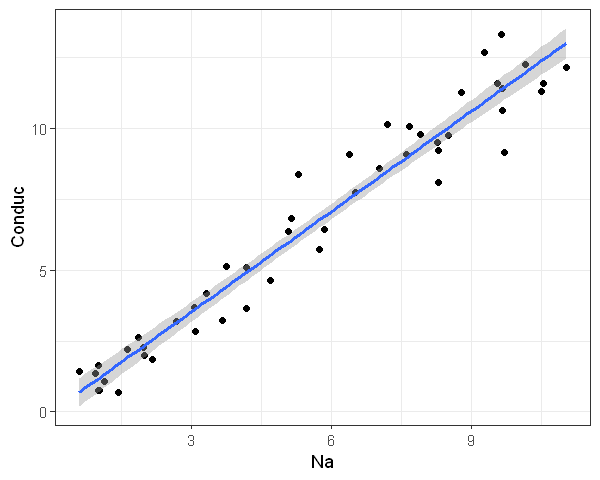

In [19]:
ggplot(data = Soils, mapping = aes(x = Na, y = Conduc)) + geom_point() + 
    stat_smooth(method = "lm") +
    theme_bw()

To add prediction intervals for individual $y$ values we have to create a new "data.frame" containing the lower and upper endpoints for our prediction interval over the sensible $x$ (Sodium, Na) values. Let's do this in a few parts. First, let's create the data.frame with the range of $x$ values we would like to have prediction intervals over:

In [ ]:
predictionDF <- data.frame(Na = seq(from = 0.5, to = 11, by = .001))

Let's use the "head" function to take a look at the first few values. 

In [ ]:
head(predictionDF)

Okay, now let's use the "prediction" function to get the prediction interval lower and upper bounds. Remember that the first argument to this function will be the name of our model. Also, this function will return a new data.frame with our $\hat{y}$, the lower endpoint, and the upper endpoint. So we will want to save this new data.frame as "predictionDF2". Later we will join this data.frame to the one with our $x$ values:

In [ ]:
predictionDF2 <- predict(lmNaConduc, newdata = predictionDF, interval = "prediction")

Let's take a look at the first few observations from that new data.frame:

In [ ]:
head(predictionDF2)

Now we can bind that "data.frame" with the other using "cbind". This function joins two data.frames by columns:

In [ ]:
predictionDF <- cbind(predictionDF, predictionDF2)

Okay, we are now ready to add the lower and upper endpoints for the prediction intervals at each $x$ as two new lines. These are the "geom_line" layers (with dashed lines specified with 'lty = 2'). **Question for you.** How do you feel about adding these lines in the color seagreen? Please answer below in a new markdown cell. If you don't like seagreen you can choose another color.

In [ ]:
ggplot(data = Soils, mapping = aes(x = Na, y = Conduc)) + geom_point() + 
    stat_smooth(method = "lm") + 
    geom_line(data = predictionDF, mapping = aes(x = Na, y = lwr), lty = 2, lwd = 1, color = "seagreen4") +
    geom_line(data = predictionDF, mapping = aes(x = Na, y = upr), lty = 2, lwd = 1, color = "seagreen4") +
    theme_bw()

## 1.5) Model diagnostics
We unfortunately do not go too much into model diagnostics in this course however, there are a few things we can check. To start let's make a plot of the residual values (the difference between the predicted value and the actual value for $y$) and the predicted values. But first we will need to make a new data.frame with the residuals and the predicted values. For the predicted values, we will use the "predict" function, and for the residuals we will use the "resid" function. 

Let's take a look a the first few predicted values $\hat{y}_i$ using the "head" function. Remember our model name was "lmNaConduc": 

In [ ]:
head(predict(lmNaConduc))

And let's take a look at the first few residual values $y_i - \hat{y}_i$:

In [ ]:
head(resid(lmNaConduc))

Now let's put these values together in a data.frame called "predResDF":

In [ ]:
predResDF <- data.frame(Predicted = predict(lmNaConduc), Residuals = resid(lmNaConduc))

And let's take a look at the first few observations from that data.frame:

In [ ]:
head(predResDF)

Now, let's plot it! We can start with a scatterplot of the residuals versus predicted:

In [ ]:
ggplot(predResDF, aes(x = Predicted, y = Residuals)) + geom_point() + theme_bw()

Let's now add a line to the plot at $y = 0$. This will help us see visually if the variance is not constant across the predicted values or if there is a non-linear relationship between the residuals and the predicted values. Let's go with magenta. We can add this using "geom_hline" which will add a horizontal line to our scatterplot for a given $y$ intercept.

In [ ]:
ggplot(predResDF, aes(x = Predicted, y = Residuals)) + geom_point() + 
    geom_hline(yintercept = 0, color = "magenta", lwd = 1.25) + theme_bw()

**Question for you?** Do you believe that there is any [strong] visual evidence of the variance not being constant across the predicted values? 

For further diagnostics, if we as R to "plot" our linear regression model it will return a series of plots that help you understand high leverage and high influence points, as well as identify if some of the other assumptions of linear regression are not met. We don't really discuss these in the class, but wikipediaing these things is likely a fun activity you should consider!

In [ ]:
plot(lmNaConduc)

## 1.6) The Coefficient of determination and The Pearson correlation coefficient
Recall that the coefficient of determination is the square of the Pearson correlation coefficient and is defined as: $	r^2_{yx} = \frac{\text{SS}(\text{Total})-\text{SS}(\text{Error})}{\text{SS}(\text{Total})}$.

Let's determine the coefficient of determination by using the sum of squares from our ANOVA table for the linear model that we estimated for predicting soil conductivity from sodium quanitity. First let's print out this table again:

In [ ]:
anova(lmNaConduc)

**Question for you**. Given the ANOVA table above, please determine the coefficient of determination below. Please use a new code cell to make the calculation.

**Question for you.** In simple terms what does this coefficient of determination represent?

We can also notice that the coefficient of determination is provided in the model summary as "Multiple R-squared" (towards the bottom of the output):

In [ ]:
summary(lmNaConduc)

Now, to determine the correlation coefficient we could take the square root of the coefficient of determination. **Question for you** Please do so below in a new code cell. 

Otherwise, we can compute the sample correlation coefficient by using the "cor" function as below:

In [ ]:
cor(Soils$Na, Soils$Conduc)

## 1.6.1) Inference regarding a population correlation coefficient
We can also test hypotheses regarding a correlation coefficient using the "cor.test" function. This function can also be utilized to determine confidence intervals for the population correlation coefficient. Below we will estimate a 95% confidence interval for the population correlation coefficient between soil sodium level and soil conductivity:

In [ ]:
cor.test(Soils$Na, Soils$Conduc)

**Question for you.** Using the same function, please determine a 95% confidence interval for the Pearson correlation coefficient between the level of potassium and the soil conductivity. The potassium variable in this data.frame is "K". 

## 1.6.2) Multiple correlation coefficients (pairs) at once
Often as an exploratory data analysis step we want to determine which pairs of continous variables are related and / or linearly correlated. To do this we can both examine pairs of scatterplots and compute the correlation coefficients. Let's do this for the pH, nitrogen, phosphorous, calcium, magnesium, potassium, sodium, and conductivity variables of this data. To start we can make pairwise scatterplots using the "pairs" function. We do this below after first changing the plot width and height defaults for this notebook

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
pairs(~pH + N + P + Ca + Mg + K + Na + Conduc, data = Soils)

Now to determine the pairwise Pearson correlation coefficients we use the same "cor" function as above. However, we will need to make sure that the data that we give this function only contains the set of variables that we want the pairwise correlations for (and no categorical or factor variables!!!). Below we will subset our Soils dataset so that it has only the variables we discussed above, and then we will determine the pairs of Pearson correlation coefficients. 

In [ ]:
cor(Soils[, c("pH", "N", "P", "Ca", "Mg", "K", "Na", "Conduc")])

In [ ]:
head(Soils)

# 2) Your turn to do some modeling!
Now, let's say you are interested in determining if the level of calcium in the soil and the level of magnesium are related (and if so how). For this, you should determine the best way to evaluate this research question--at minimum construct a linear regression model, evaluate how well it fits, interpret the regression parameters, and evaluate the correlation coefficient. Remember confidence intervals are awesome, they contain a lot of information!